In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes estéticos
plt.style.use("ggplot")
pd.set_option("display.max_columns", None)

# Carga del CSV
file_path = r"C:\Users\felip\mining-silica-prediction\data\raw\MiningProcess_Flotation_Plant_Database.csv"
df = pd.read_csv(file_path, parse_dates=["date"])
df = df.set_index("date").sort_index()

df.head()




,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313","295,096","306,4","251,345","248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049","295,096","306,4","250,422","251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895","295,096","306,4","249,983","248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [14]:
file_path = r"C:\Users\felip\mining-silica-prediction\data\raw\MiningProcess_Flotation_Plant_Database.csv"


In [18]:
import pandas as pd

raw = pd.read_csv(
        r"C:\Users\felip\mining-silica-prediction\data\raw\MiningProcess_Flotation_Plant_Database.csv",
        sep=";",          # separador correcto
        decimal=",",      # separador decimal europeo
        nrows=0           # solo cabeceras
)
print(raw.columns.tolist())


['date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate']


In [26]:
import pandas as pd

file_path = r"C:\Users\felip\mining-silica-prediction\data\raw\MiningProcess_Flotation_Plant_Database.csv"

df = (pd.read_csv(
          file_path,
          sep=",",           # ← separador correcto
          decimal=",",       # ← coma decimal dentro de comillas
          quotechar='"',     # ← elimina las comillas alrededor de cada valor
          parse_dates=['date'],   # ← convierte directamente la fecha
          dayfirst=False,    # ya viene en orden año‑mes‑día
          engine="python"    # motor más flexible para comillas + coma decimal
      )
        .set_index('date')   # índice temporal
        .sort_index())


In [27]:
df.info()          # todas las columnas numéricas → float64 / float32
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


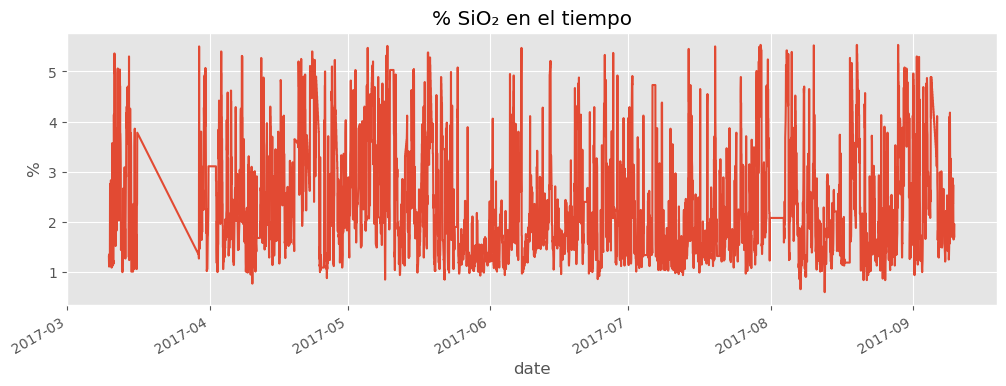

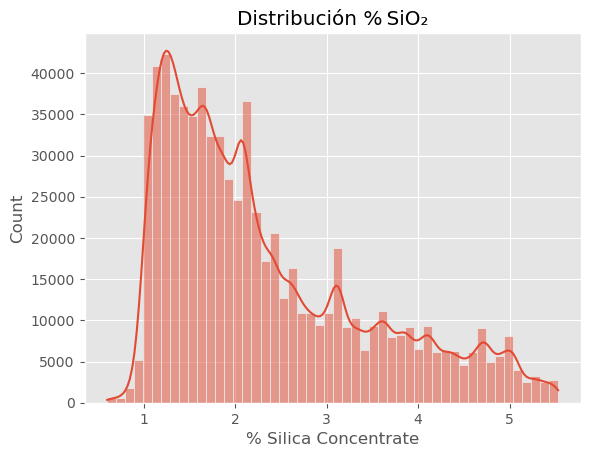

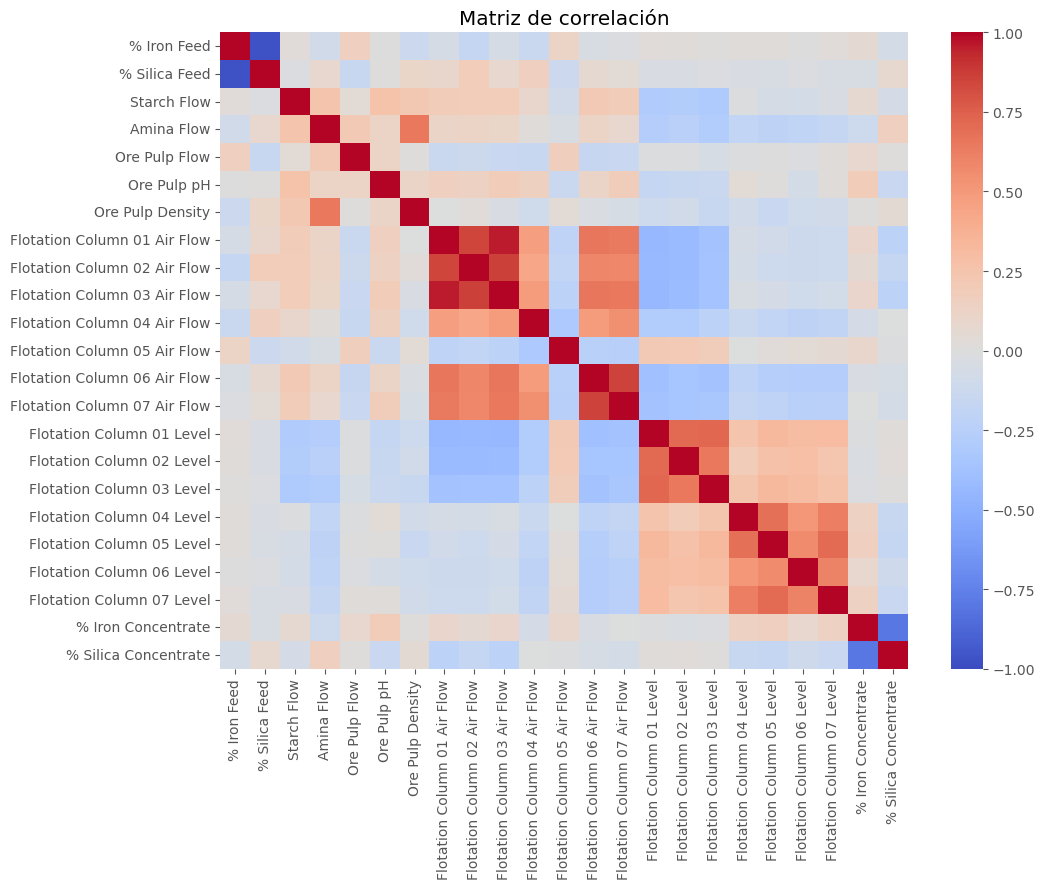

,lag_1h,lag_3h,lag_6h,lag_12h
% Silica Concentrate,0.998783,0.996347,0.992689,0.985357
Amina Flow,0.156532,0.156239,0.155828,0.154859
% Silica Feed,0.072678,0.072587,0.072449,0.072173
Ore Pulp Density,0.046965,0.046922,0.046836,0.046629
Flotation Column 02 Level,0.031019,0.031161,0.031368,0.031870
Flotation Column 01 Level,0.017289,0.017403,0.017525,0.017790
Flotation Column 03 Level,0.014295,0.014408,0.014557,0.014766
Ore Pulp Flow,0.008209,0.008229,0.008130,0.008028
Flotation Column 04 Air Flow,-0.005028,-0.005066,-0.005079,-0.005079
Flotation Column 05 Air Flow,-0.009280,-0.009286,-0.009389,-0.009432


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

target = "% Silica Concentrate"

# 1. Serie temporal
df[target].plot(figsize=(12,4), title="% SiO₂ en el tiempo")
plt.ylabel("%"); plt.show()

# 2. Distribución
sns.histplot(df[target].dropna(), bins=50, kde=True)
plt.title("Distribución % SiO₂"); plt.show()

# 3. Matriz de correlación
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(numeric_only=True),
            cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Matriz de correlación"); plt.tight_layout(); plt.show()

# 4. Correlación con retardos
lags = [1, 3, 6, 12]  # horas
lag_corr = {f"lag_{l}h": df.corrwith(df[target].shift(-l),
                                     numeric_only=True)
            for l in lags}
(pd.DataFrame(lag_corr)
   .sort_values("lag_1h", ascending=False)
   .head(15))


In [30]:
# src/features/make_features.py
import argparse
import pandas as pd
import numpy as np
from pathlib import Path


LAGS = [1, 3, 6, 12]           # horas
ROLL_WINDOWS = [3, 6]          # horas
TOP_LAG_VARS = [
    "Amina Flow", "% Silica Feed", "Ore Pulp Density",
    "% Iron Feed", "Ore Pulp pH"
]


def add_time_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # Hora cíclica (0‑23)
    hours = df.index.hour
    df["hour_sin"] = np.sin(2 * np.pi * hours / 24)
    df["hour_cos"] = np.cos(2 * np.pi * hours / 24)
    return df


def add_lag_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for lag in LAGS:
        out = out.join(df.shift(lag).add_suffix(f"_lag{lag}"))
    return out


def add_roll_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for w in ROLL_WINDOWS:
        rolled = (
            df[TOP_LAG_VARS]
            .rolling(f"{w}h", min_periods=1)
            .agg(["mean", "std"])
        )
        # nivel de columnas: (var, agg) --> var_mean_w3h
        rolled.columns = [
            f"{v}_{agg}_w{w}h" for v, agg in rolled.columns.to_list()
        ]
        out = out.join(rolled)
    return out


def make_features(in_csv: Path, out_parquet: Path):
    df = pd.read_csv(
        in_csv,
        sep=",",
        decimal=",",
        quotechar='"',
        parse_dates=["date"],
        index_col="date",
    ).sort_index()

    # ingeniería
    df_feat = add_time_features(df)
    df_feat = add_lag_features(df_feat)
    df_feat = add_roll_features(df_feat)

    # quitar filas con NaNs introducidos por lags/rolling al principio
    df_feat = df_feat.dropna()

    out_parquet.parent.mkdir(parents=True, exist_ok=True)
    df_feat.to_parquet(out_parquet)
    print(f"✅ Features guardadas en {out_parquet}")





In [31]:
from pathlib import Path
from src.features.make_features import make_features

make_features(
    in_csv=Path("data/raw/MiningProcess_Flotation_Plant_Database.csv"),
    out_parquet=Path("data/processed/train.parquet")
)


ModuleNotFoundError: No module named 'src'